In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# 1. Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data  # Feature matrix (70,000 samples of 784 features)
y = mnist.target.astype(int)  # Labels (digits 0-9)


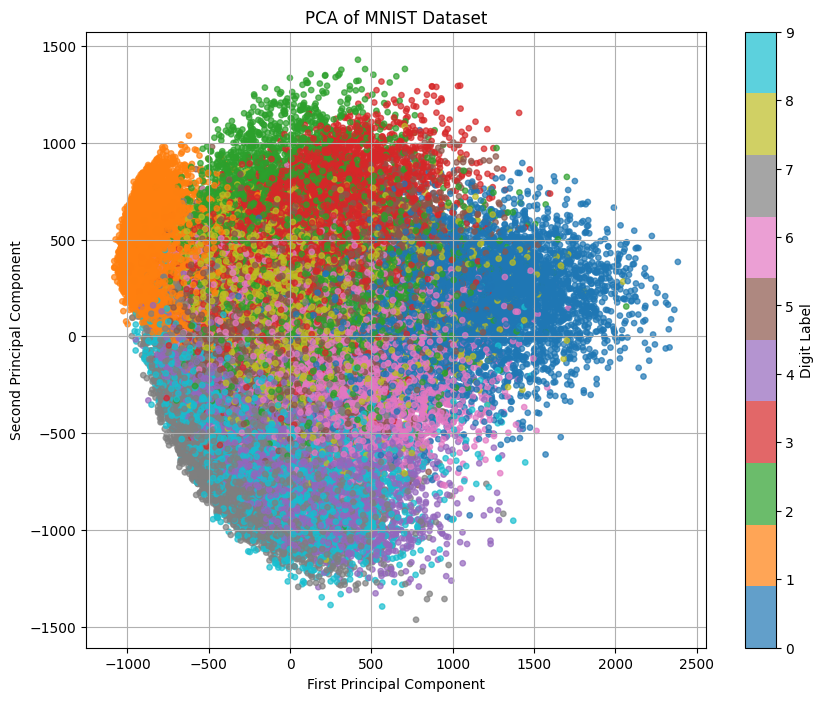

In [2]:

# 2. Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Plot the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=15)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of MNIST Dataset')
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.grid(True)
plt.show()

Means of the clusters:
Cluster 0: Mean = [-384.00928467 -479.53332186]
Cluster 1: Mean = [94.82704908 10.1248107 ]
Cluster 2: Mean = [1256.22861303  219.69573301]
Cluster 3: Mean = [-893.09328394  461.31441103]
Cluster 4: Mean = [623.15943679 148.07490027]
Cluster 5: Mean = [ -35.71358437 -782.20145718]
Cluster 6: Mean = [-199.87529747  394.73304891]
Cluster 7: Mean = [285.65510166 645.80612476]
Cluster 8: Mean = [-512.75518636   81.03676702]
Cluster 9: Mean = [ 405.09375687 -585.69400869]

Standard deviations of the clusters:
Cluster 0: Std Dev = [180.9425182 186.7089226]
Cluster 1: Std Dev = [214.12076441 251.30932812]
Cluster 2: Std Dev = [346.67769536 237.20594561]
Cluster 3: Std Dev = [ 78.68403243 192.02652368]
Cluster 4: Std Dev = [253.18101347 232.91502479]
Cluster 5: Std Dev = [216.67873303 177.86915037]
Cluster 6: Std Dev = [239.62376037 228.12659129]
Cluster 7: Std Dev = [311.25415054 263.90882658]
Cluster 8: Std Dev = [197.11553603 210.79047531]
Cluster 9: Std Dev = [282.32

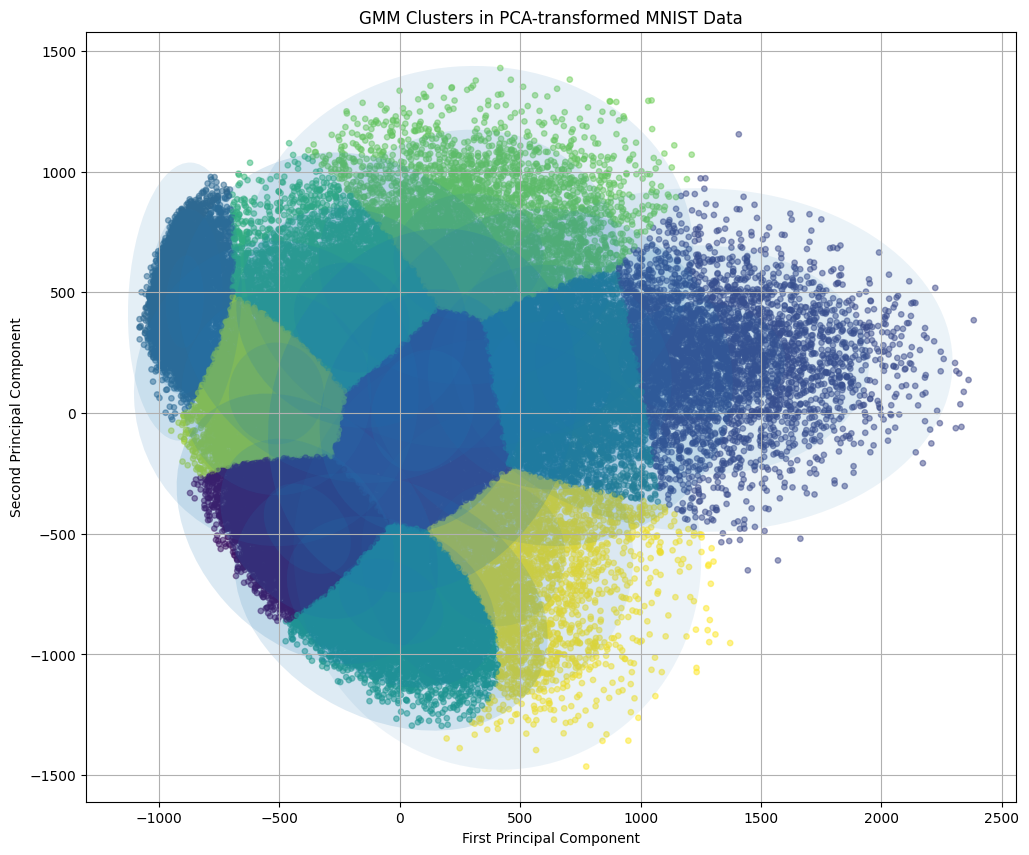

In [3]:
from sklearn.mixture import GaussianMixture

# 3. Fit a Gaussian Mixture Model with 10 components
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(X_pca)

# 4. Retrieve the means and covariances
means = gmm.means_  # Shape (10, 2)
covariances = gmm.covariances_  # Shape (10, 2, 2)

# 5. Compute standard deviations from covariances
stds = np.sqrt(np.array([np.diag(cov) for cov in covariances]))  # Shape (10, 2)

# 6. Print the means and standard deviations
print("Means of the clusters:")
for idx, mean in enumerate(means):
    print(f"Cluster {idx}: Mean = {mean}")

print("\nStandard deviations of the clusters:")
for idx, std in enumerate(stds):
    print(f"Cluster {idx}: Std Dev = {std}")

# 7. Optional: Plot the GMM clusters with ellipses
def plot_gmm(gmm, X, label=True, ax=None):
    import matplotlib as mpl
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='viridis', alpha=0.5)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5)
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    from matplotlib.patches import Ellipse
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        width, height = 2 * np.sqrt(covariance)
        angle = 0
    for nsig in range(1, 4):  # 1 to 3 standard deviations
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle=angle, **kwargs))

plt.figure(figsize=(12, 10))
plot_gmm(gmm, X_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('GMM Clusters in PCA-transformed MNIST Data')
plt.grid(True)
plt.show()